# Machine Learning with H2O - Tutorial 2: Basic Data Manipulation

<hr>

**Objective**:

- This tutorial demonstrates basic data manipulation with H2O.

<hr>

**Titanic Dataset:**

- Source: https://www.kaggle.com/c/titanic/data

<hr>

**Full Technical Reference:**

- http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html

<br>


In [1]:
# Start and connect to a local H2O cluster
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_131"; OpenJDK Runtime Environment (build 1.8.0_131-8u131-b11-0ubuntu1.16.04.2-b11); OpenJDK 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /home/joe/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0cekp48d
  JVM stdout: /tmp/tmp0cekp48d/h2o_joe_started_from_python.out
  JVM stderr: /tmp/tmp0cekp48d/h2o_joe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.5.2
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_joe_74ajjq
H2O cluster total nodes:,1
H2O cluster free memory:,5.210 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


<br>

In [2]:
# Import Titanic data (local CSV)
titanic = h2o.import_file("kaggle_titanic.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Explore the dataset using various functions
titanic.head(10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,nan,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,nan,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,nan,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


<br>

Explain why we need to transform

<br>

In [4]:
# Explore the column 'Survived'
titanic['Survived'].summary()

,Survived
type,int
mins,0.0
mean,0.3838383838383838
maxs,1.0
sigma,0.4865924542648575
zeros,549
missing,0
0,0.0
1,1.0
2,1.0


/home/joe/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


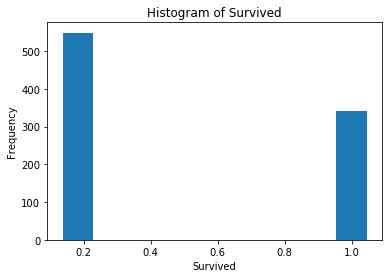

In [5]:
# Use hist() to create a histogram
titanic['Survived'].hist()

In [6]:
# Use table() to summarize 0s and 1s
titanic['Survived'].table()

Survived,Count
0,549
1,342


In [7]:
# Convert 'Survived' to categorical variable
titanic['Survived'] = titanic['Survived'].asfactor()

In [8]:
# Look at the summary of 'Survived' again
# The feature is now an 'enum' (enum is the name of categorical variable in Java)
titanic['Survived'].summary()

,Survived
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,0
1,1
2,1


<br>

Doing the same for 'Pclass'

<br>

In [9]:
# Explore the column 'Pclass'
titanic['Pclass'].summary()

,Pclass
type,int
mins,1.0
mean,2.3086419753086447
maxs,3.0
sigma,0.8360712409770491
zeros,0
missing,0
0,3.0
1,1.0
2,3.0


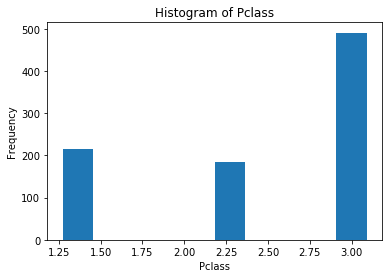

In [10]:
# Use hist() to create a histogram
titanic['Pclass'].hist()

In [11]:
# Use table() to summarize 1s, 2s and 3s
titanic['Pclass'].table()

Pclass,Count
1,216
2,184
3,491


In [12]:
# Convert 'Pclass' to categorical variable
titanic['Pclass'] = titanic['Pclass'].asfactor()

In [13]:
# Explore the column 'Pclass' again
titanic['Pclass'].summary()

,Pclass
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,3
1,1
2,3
